<a href="https://colab.research.google.com/github/satyadevshetty/Pytorch_Notebooks/blob/main/Inferencing_Instance_Segmentation_with_PyTorch_and_Mask_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://debuggercafe.com/instance-segmentation-with-pytorch-and-mask-r-cnn/

In [1]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [2]:
#utils.py

import cv2
import numpy as np
import random
import torch
# from coco_names import COCO_INSTANCE_CATEGORY_NAMES as coco_names
# import COCO_INSTANCE_CATEGORY_NAMES as coco_names

In [3]:
#Colab Modification
coco_names = COCO_INSTANCE_CATEGORY_NAMES

In [8]:
len(coco_names)

91

In [4]:
#utils.py
# this will help us create a different color for each class
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

In [32]:
COLORS

array([[ 68.50253553, 134.95615862, 212.16200121],
       [ 53.18720304, 247.5353367 , 162.05663252],
       [200.59834139, 201.5007158 , 131.60832341],
       [144.42219782, 201.60244788, 199.23944486],
       [118.94595921,  23.47213033,  46.70702955],
       [235.55563287, 147.88426864, 122.14432038],
       [224.08382844, 242.56140824,  88.75801458],
       [165.38329396, 208.05742527,  88.75364747],
       [218.4770515 ,  83.39034457, 121.12827855],
       [200.88102878, 238.41953133, 218.06677039],
       [132.04296561,  54.07094976,  78.99645983],
       [132.82164856, 159.92206656, 180.16777479],
       [ 65.34371587, 126.36454194,  17.18074884],
       [191.34106402,  93.73830504, 132.97089416],
       [ 23.52266371,  32.31712666,  92.08900046],
       [ 27.98251002,  62.98759544, 156.88376838],
       [ 91.2752241 ,  23.95974046,  76.40713591],
       [  5.35435906,   7.55507329,  16.89254136],
       [249.88306923, 159.56832992,  96.86826456],
       [180.44878087, 135.17364

In [7]:
#Checking COLORS
len(COLORS)

91

In [5]:
#Random color for each class to make the mask
COLORS

array([[ 68.50253553, 134.95615862, 212.16200121],
       [ 53.18720304, 247.5353367 , 162.05663252],
       [200.59834139, 201.5007158 , 131.60832341],
       [144.42219782, 201.60244788, 199.23944486],
       [118.94595921,  23.47213033,  46.70702955],
       [235.55563287, 147.88426864, 122.14432038],
       [224.08382844, 242.56140824,  88.75801458],
       [165.38329396, 208.05742527,  88.75364747],
       [218.4770515 ,  83.39034457, 121.12827855],
       [200.88102878, 238.41953133, 218.06677039],
       [132.04296561,  54.07094976,  78.99645983],
       [132.82164856, 159.92206656, 180.16777479],
       [ 65.34371587, 126.36454194,  17.18074884],
       [191.34106402,  93.73830504, 132.97089416],
       [ 23.52266371,  32.31712666,  92.08900046],
       [ 27.98251002,  62.98759544, 156.88376838],
       [ 91.2752241 ,  23.95974046,  76.40713591],
       [  5.35435906,   7.55507329,  16.89254136],
       [249.88306923, 159.56832992,  96.86826456],
       [180.44878087, 135.17364

In [27]:
#utils.py
def get_outputs(image, model, threshold):
    with torch.no_grad():
        # forward pass of the image through the modle
        outputs = model(image) 
    
    # get all the scores , scores are all sorted in descending order so we get the highest score 1st 
    # Masks , boxes - These are also sorted corresponding to the scores
    scores = list(outputs[0]['scores'].detach().cpu().numpy())
    # print(f'Scores: {scores}')
    # print(f'Outputs: {outputs}')
    # index of those scores which are above a certain threshold
    thresholded_preds_inidices = [scores.index(i) for i in scores if i > threshold]
    thresholded_preds_count = len(thresholded_preds_inidices)
    # print(f'Thresholded Indexes: {thresholded_preds_inidices}')
    # get the masks
    masks = (outputs[0]['masks']>0.5).squeeze().detach().cpu().numpy()
    # print(f"Masks Dim: {outputs[0]['masks'].size()}")
    # print(f'Numpy shape: {np.shape(masks)}')
    # print(f'Scores: {np.shape(scores)}')
    # print(f'Thresholded Indexes Count: {thresholded_preds_count}')

    # discard masks for objects which are below threshold
    masks = masks[:thresholded_preds_count]
    # get the bounding boxes, in (x1, y1), (x2, y2) format
    boxes = [[(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))]  for i in outputs[0]['boxes'].detach().cpu()]
    # print(f'Boxes Shape per Thresholding: {np.shape(boxes)}')
    # discard bounding boxes below threshold value
    boxes = boxes[:thresholded_preds_count]
    
    # get the classes labels
    labels = [coco_names[i] for i in outputs[0]['labels']]
    return masks, boxes, labels

In [40]:
#utils.py

def draw_segmentation_map(image, masks, boxes, labels):
    alpha = 1 
    beta = 0.6 # transparency for the segmentation map
    gamma = 0 # scalar added to each sum
    for i in range(len(masks)):
        red_map = np.zeros_like(masks[i]).astype(np.uint8)
        green_map = np.zeros_like(masks[i]).astype(np.uint8)
        blue_map = np.zeros_like(masks[i]).astype(np.uint8)
        # print(f'red_map: {np.shape(red_map)}')
        # apply a randon color mask to each object
        color = COLORS[random.randrange(0, len(COLORS))]
        # print(f'Color: {color}')
        red_map[masks[i] == 1], green_map[masks[i] == 1], blue_map[masks[i] == 1]  = color
        # print(f'Green Map after applying color: {green_map}')
        # combine all the masks into a single image
        segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
        # print(f'segmentation_map: {segmentation_map}')

        #convert the original PIL image into NumPy format
        image = np.array(image)
        # convert from RGN to OpenCV BGR format
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # apply mask on the image
        cv2.addWeighted(image, alpha, segmentation_map, beta, gamma, image)
        # draw the bounding boxes around the objects
        cv2.rectangle(image, boxes[i][0], boxes[i][1], color=color, 
                      thickness=2)
        # put the label text above the objects
        cv2.putText(image , labels[i], (boxes[i][0][0], boxes[i][0][1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 
                    thickness=2, lineType=cv2.LINE_AA)
    
    return image

##mask_rcnn_images.py STARTS

In [8]:
import torch
import torchvision
import cv2
import argparse
from PIL import Image
# from utils import draw_segmentation_map, get_outputs  # for Colab these functions r defined in the cells above so no need to import
from torchvision.transforms import transforms as transforms
from google.colab.patches import cv2_imshow

In [ ]:
#Dont Execute
#No Need in Google Colab, only if ur executing from command line
parser = argparse.ArgumentParser()
parser.add_argument('-i', '--input', required=True, 
                    help='path to the input data')
parser.add_argument('-t', '--threshold', default=0.965, type=float,
                    help='score threshold for discarding detection')
args = vars(parser.parse_args())

In [9]:
# initialize the model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True, progress=True, 
                                                           num_classes=91)
# set the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# load the modle on to the computation device and set to eval mode
model.to(device).eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 94.3MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [10]:
# transform to convert the image to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

In [11]:
#Download file from  Google Drive
# https://drive.google.com/file/d/186Ph64SuxmuGqcxfmSyjk4E1EZxxWg6w/view?usp=sharing
!gdown 186Ph64SuxmuGqcxfmSyjk4E1EZxxWg6w

Downloading...
From: https://drive.google.com/uc?id=186Ph64SuxmuGqcxfmSyjk4E1EZxxWg6w
To: /content/input.zip
100% 784k/784k [00:00<00:00, 113MB/s]


In [12]:
!ls

input.zip  sample_data


In [13]:
!unzip input.zip

Archive:  input.zip
   creating: input/
  inflating: input/image1.jpg        
  inflating: input/image2.jpg        
  inflating: input/image3.jpg        


In [14]:
#Use this as Parser will not work on Colab , parser is only for command line execution
IMG_PATH = 'input/image1.jpg'
THRESHOLD = .5  #.965  
#If u reduce the threshold then there will be more predictions, howeever these increased predictions might not be accurate
#U will also find overlapping BBoxes & masks for ex: for same person there might be 2 boxes & masks 

Color: [ 80.42784377 220.28797424 253.78370136]
segmentation_map: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Color: [ 5.35435906  7.55507329 16.89254136]
segmentation_map: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Color: [206.37820771  51.99209231  73.09580

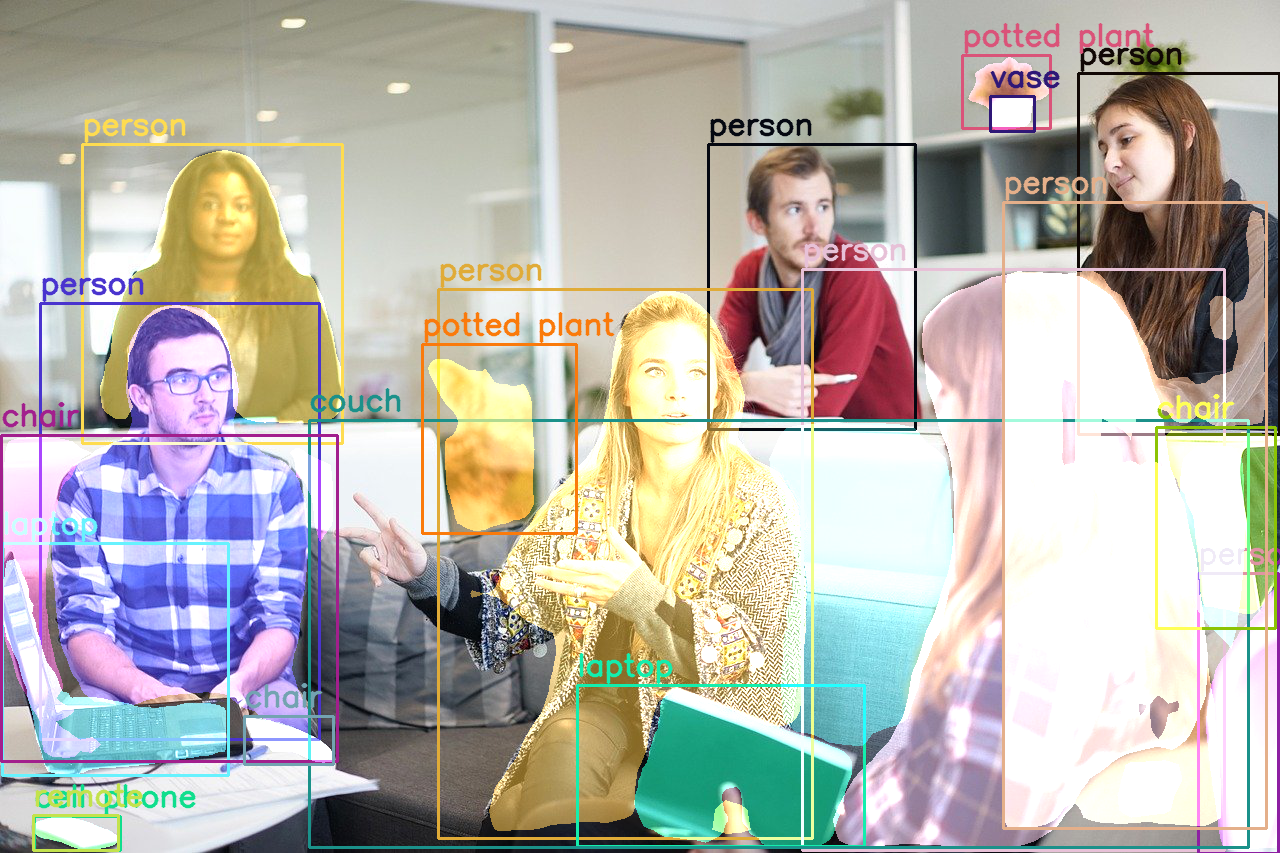

-1

In [41]:
# image_path = args['input']
image_path = IMG_PATH
image = Image.open(image_path).convert('RGB')
# keep a copy of the original image for OpenCV functions and applying masks
orig_image = image.copy()
# transform the image
image = transform(image)
# add a batch dimension
image = image.unsqueeze(0).to(device)
#Uncomment for File based execution on desktop or other machines
# masks, boxes, labels = get_outputs(image, model, args['threshold'])
#For Google Colab Usage
masks, boxes, labels = get_outputs(image, model, THRESHOLD)

result = draw_segmentation_map(orig_image, masks, boxes, labels)
# visualize the image
#For Non Google Colab uncomment below
# cv2.imshow('Segmented image', result)

#For Google Colab use below
cv2_imshow(result)

cv2.waitKey(0)
# set the save path
#Not saving output in Google Colab, if you need to save then change path below
# save_path = f"../outputs/{args['input'].split('/')[-1].split('.')[0]}.jpg"
# cv2.imwrite(save_path, result)

In [43]:
x = torch.tensor([1, 2, 3, 4])
x
x.shape

torch.Size([4])

In [48]:
x_unsqueeze = torch.unsqueeze(x, 0)
x_unsqueeze.shape
x_unsqueeze

tensor([[1, 2, 3, 4]])